In [1]:
import numpy as np
import pandas  as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
ROOT_PATH = '../features/'

In [2]:
df = pd.read_csv("../data/court_cases.csv", lineterminator='\n', index_col=0)
df['Full Text'] = df['process'] + ' ' + df['considerations']
df.dropna(subset=['Full Text'],inplace=True)
df = df.sample(frac=1,random_state=0).reset_index(drop=True).copy()
rus = RandomUnderSampler(random_state=42)
X= df[['process', 'considerations', 'instance','Full Text']]
y = df[['outcome']]
X_rus, y_rus = rus.fit_resample(X,y)
X_rus['outcome'] = y_rus
df = X_rus

In [4]:
#Global Average Importance
# Creating dictionary for the number of times a word occurs

full_text = ''
for i in df['Full Text']:
    full_text = full_text+i + ' '
    
from nltk.tokenize import word_tokenize,sent_tokenize
# Tokenized words from document
tokenized_words =  [j for i in sent_tokenize(full_text) for j in word_tokenize(i)]
word_dict = Counter(tokenized_words)

def get_frequency(word):
    return word_dict[word]




In [5]:
def bert_cleanup(bert_feature_importance):
    bert_feature_importance = bert_feature_importance.copy()
    bert_feature_importance = bert_feature_importance[~bert_feature_importance.FeatureAligned.isin(stopwords.words('dutch')+['.'])].copy()
    bert_feature_importance = bert_feature_importance.groupby('FeatureAligned')['Importance'].sum().sort_values(ascending=False).to_frame().reset_index()
    bert_feature_importance.columns = ['FeatureNames', 'FeatureImportance']
    return bert_feature_importance


In [6]:
#loading and cleaning builtin feature importance for BERT
bert_built_in = pd.read_csv('../features/'+'bert_1_1_500_words.csv')
bert_built_in_df = bert_cleanup(bert_built_in)
with open('vocab.txt') as f:
    lines = f.read().splitlines()
i = []
for index,row in bert_built_in_df.iterrows():
    if row.FeatureNames not in lines:
        i.append(index)
bert_built_in_df.drop(index = i, inplace = True)
bert_built_in_df.reset_index(inplace = True, drop = True )


In [7]:
#get count for each word
bert_built_in_df['frequency'] = bert_built_in_df.FeatureNames.apply(get_frequency) 
#compute the global average
bert_built_in_df['FeatureImportance'] = bert_built_in_df['FeatureImportance']/bert_built_in_df['frequency'] 
bert_built_in_df.drop(columns = ['frequency'], inplace = True)
bert_built_in_df.sort_values(by ='FeatureImportance', ascending = False, inplace = True)
bert_built_in_df.reset_index(inplace = True, drop = True)


In [8]:
#loading and cleaning feature importance for BERT with lime
bert_lime_feature_importance = pd.read_csv('../features/'+'bert_1_1_lime_500_words.csv')
bert_lime_feature_importance_df  = bert_cleanup(bert_lime_feature_importance)

with open('vocab.txt') as f:
    lines = f.read().splitlines()
i = []
for index,row in bert_lime_feature_importance_df.iterrows():
    if row.FeatureNames not in lines:
        i.append(index)
bert_lime_feature_importance_df.drop(index = i, inplace = True)
bert_lime_feature_importance_df.reset_index(inplace = True, drop = True )


In [9]:
#get count for each word
bert_lime_feature_importance_df['frequency'] = bert_lime_feature_importance_df.FeatureNames.apply(get_frequency) 
#compute the global average
bert_lime_feature_importance_df['FeatureImportance'] = bert_lime_feature_importance_df['FeatureImportance']/bert_lime_feature_importance_df['frequency'] 
bert_lime_feature_importance_df.drop(columns = ['frequency'], inplace = True)
bert_lime_feature_importance_df.sort_values(by ='FeatureImportance', ascending = False, inplace = True)
bert_lime_feature_importance_df.reset_index(inplace = True, drop = True)


In [10]:
#loading and cleaning feature importance for BERT with SHAP
bert_shap_df = pd.read_csv('../features/'+'bert_shap_1_1_500_words.csv')
bert_shap_df  = bert_cleanup(bert_shap)

with open('vocab.txt') as f:
    lines = f.read().splitlines()
i = []
for index,row in bert_shap_df.iterrows():
    if row.FeatureNames not in lines:
        i.append(index)
bert_shap_df.drop(index = i, inplace = True)
bert_shap_df.reset_index(inplace = True, drop = True )



In [11]:
#get count for each word
bert_shap_df['frequency'] = bert_shap_df.FeatureNames.apply(get_frequency) 
#compute the global average
bert_shap_df['FeatureImportance'] = bert_shap_df['FeatureImportance']/bert_shap_df['frequency'] 
bert_shap_df.drop(columns = ['frequency'], inplace = True)
bert_shap_df.sort_values(by ='FeatureImportance', ascending = False, inplace = True)
bert_shap_df.reset_index(inplace = True, drop = True)


In [12]:
svm_builtin = pd.read_csv(ROOT_PATH+'svm_1_1_builtin_500_words.csv')
xgb_builtin = pd.read_csv(ROOT_PATH+'xgb_1_1_builtin_500_words.csv')


In [13]:
svm_lime = pd.read_csv(ROOT_PATH+'svm_1_1_lime_500_words.csv.gz',compression='gzip')
xgb_lime = pd.read_csv(ROOT_PATH+'xgb_1_1_lime_500_words.csv.gz',compression='gzip')


In [14]:
svm_shap = pd.read_csv(ROOT_PATH+'svm_1_1_shap_500_words.csv.gz',compression='gzip')
xgb_shap = pd.read_csv(ROOT_PATH+'xgb_1_1_shap_500_words.csv.gz',compression='gzip')

In [15]:
svm_lime_df = svm_lime.groupby('word')['importance'].sum().sort_values(ascending=False).to_frame().reset_index()
xgb_lime_df = xgb_lime.groupby('word')['importance'].sum().sort_values(ascending=False).to_frame().reset_index()
svm_shap_df = svm_shap.groupby('word')['importance'].sum().sort_values(ascending=False).to_frame().reset_index()
xgb_shap_df = xgb_shap.groupby('word')['importance'].sum().sort_values(ascending=False).to_frame().reset_index()

In [16]:
#Get global average importance

#get count for each word
svm_lime_df['frequency'] = svm_lime_df.word.apply(get_frequency) 
#compute the global average
svm_lime_df['importance'] = svm_lime_df['importance']/svm_lime_df['frequency'] 
svm_lime_df.drop(columns = ['frequency'], inplace = True)
svm_lime_df.sort_values(by ='importance', ascending = False, inplace = True)
svm_lime_df.reset_index(inplace = True, drop = True)

#get count for each word
xgb_lime_df['frequency'] = xgb_lime_df.word.apply(get_frequency) 
#compute the global average
xgb_lime_df['importance'] = xgb_lime_df['importance']/xgb_lime_df['frequency'] 
xgb_lime_df.drop(columns = ['frequency'], inplace = True)
xgb_lime_df.sort_values(by ='importance', ascending = False, inplace = True)
xgb_lime_df.reset_index(inplace = True, drop = True)

#get count for each word
svm_shap_df['frequency'] = svm_shap_df.word.apply(get_frequency) 
#compute the global average
svm_shap_df['importance'] = svm_shap_df['importance']/svm_shap_df['frequency'] 
svm_shap_df.drop(columns = ['frequency'], inplace = True)
svm_shap_df.sort_values(by ='importance', ascending = False, inplace = True)
svm_shap_df.reset_index(inplace = True, drop = True)

#get count for each word
xgb_shap_df['frequency'] = xgb_shap_df.word.apply(get_frequency) 
#compute the global average
xgb_shap_df['importance'] = xgb_shap_df['importance']/xgb_shap_df['frequency'] 
xgb_shap_df.drop(columns = ['frequency'], inplace = True)
xgb_shap_df.sort_values(by ='importance', ascending = False, inplace = True)
xgb_shap_df.reset_index(inplace = True, drop = True)



In [19]:
#Function for getting Jaccard Similarity

def jaccard_similarity(list1, list2):
    s1, s2 = set(list1), set(list2)
    return len(s1 & s2) / len(s1 | s2)

def get_jaccard_sim_df(svm_builtin,xgb_builtin,N=50):
    total_no_of_features = N
    sim = [(N,jaccard_similarity(svm_builtin.iloc[:N,0],xgb_builtin.iloc[:N,0])) for N in range(1,total_no_of_features)]    
    df = pd.DataFrame(sim,columns=['No of Features','Jaccard Similarity'])
    return df


SVM builtin
SVM lime
SVM shap


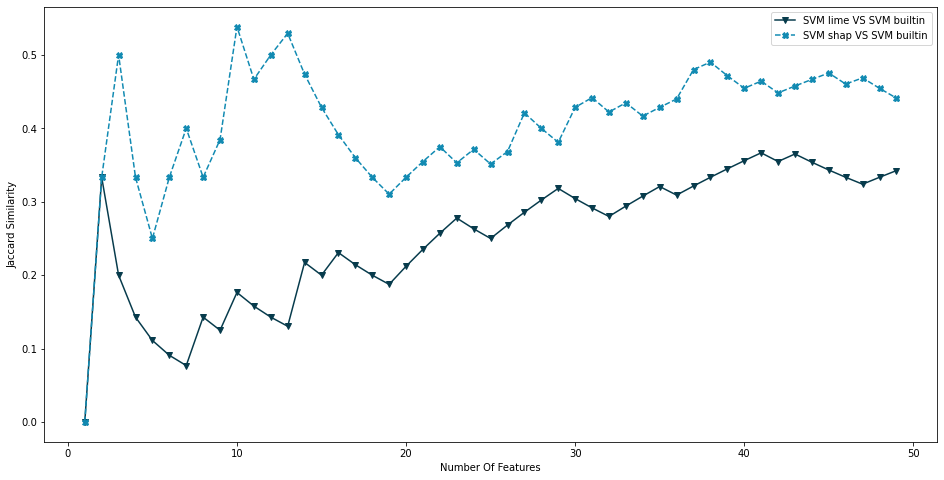

In [20]:
plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
    'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
  
}
legend = []
counter = 0
count = len(model_list)
for df_a_key in model_list.keys():
    print(df_a_key)
    for df_b_key in model_list.keys():
        count = count - 1
        if count == 1:
            break
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1
        break
plt.legend(legend)

XGB builtin
XGB lime
XGB shap


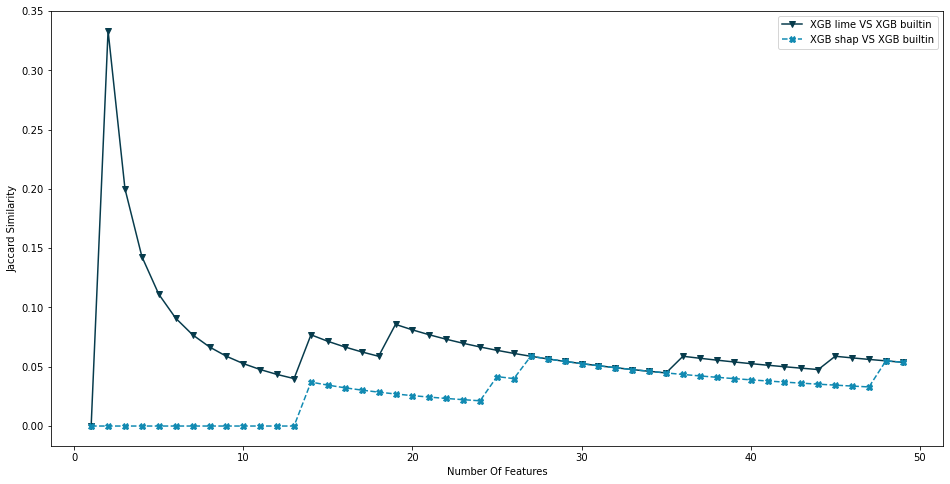

In [21]:

plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
  
}
legend = []
counter = 0
count = len(model_list)
for df_a_key in model_list.keys():
    print(df_a_key)
    for df_b_key in model_list.keys():
        count = count - 1
        if count == 1:
            break
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1
        break
plt.legend(legend)

BERT builtin
BERT lime
BERT shap


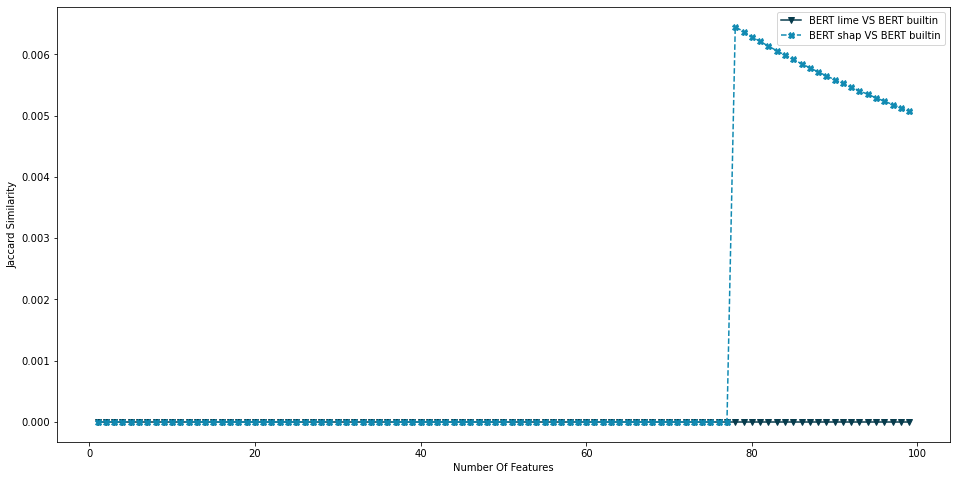

In [22]:

plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
    'BERT builtin' : bert_built_in_df,
    'BERT lime' : bert_lime_feature_importance_df,
    'BERT shap' : bert_shap_df,
  
}
legend = []
counter = 0
count = len(model_list)
for df_a_key in model_list.keys():
    print(df_a_key)
    for df_b_key in model_list.keys():
        count = count - 1
        if count == 1:
            break
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        df_jac = get_jaccard_sim_df(df_a,df_b,N=100)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1
        break
plt.legend(legend)

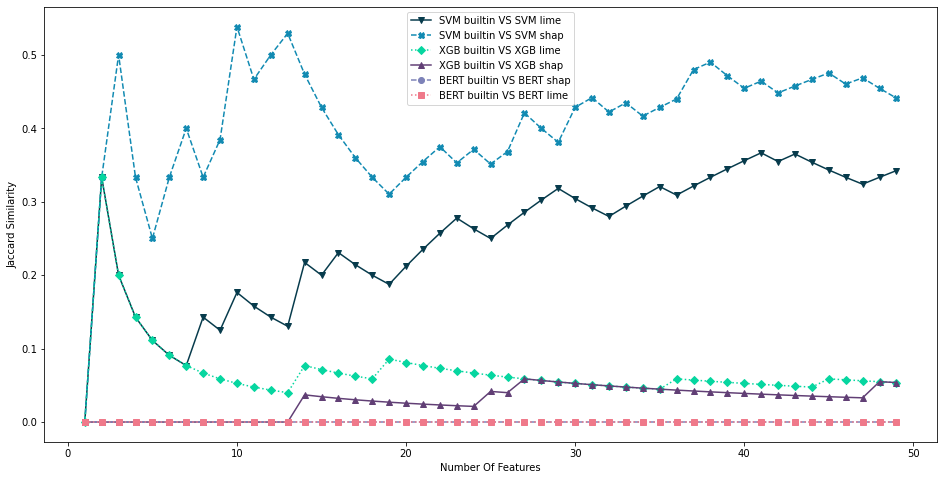

In [23]:


x = [('SVM builtin', 'SVM lime'),('SVM builtin', 'SVM shap'), ('XGB builtin', 'XGB lime'),
     ('XGB builtin', 'XGB shap'),('BERT builtin', 'BERT lime'),('BERT builtin', 'BERT shap')]





plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
     'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
    'BERT builtin' : bert_built_in_df,
    'BERT shap' : bert_shap_df,
    'BERT lime' : bert_lime_feature_importance_df
 
  
}
legend = []
counter = 0
l = []
for df_a_key in model_list.keys():
    for df_b_key in model_list.keys():
        #print(df_b_key)
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        if (df_a_key,df_b_key) not in x:
            continue
        l.append((df_a_key,df_b_key))
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1

plt.legend(legend)

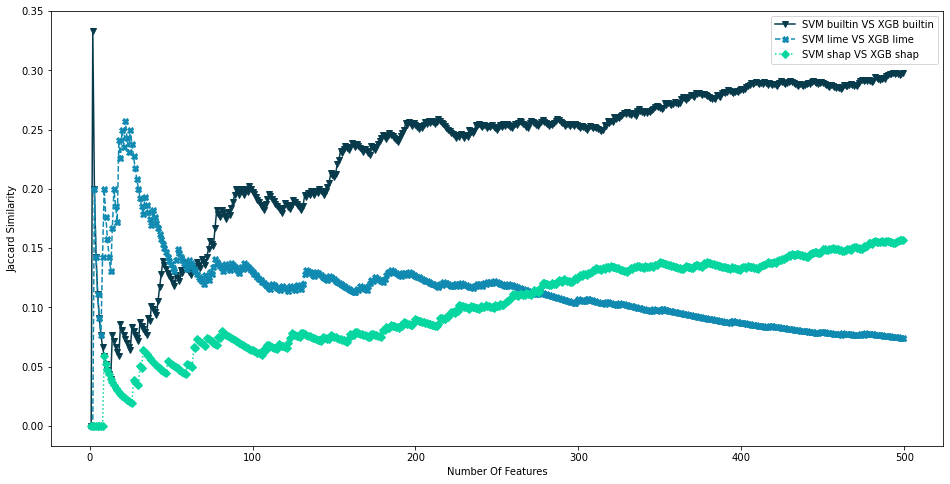

In [24]:
x = [('SVM builtin', 'XGB builtin'), ('XGB builtin', 'BERT builtin'),
    ('BERT builtin', 'SVM builtin'),('SVM lime', 'XGB lime'), ('XGB lime', 'BERT lime'),
    ('BERT lime', 'SVM lime'), ('SVM shap', 'XGB shap'), ('XGB shap', 'BERT shap'),
    ('BERT shap', 'SVM shap') ]



plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
     'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
 
}
legend = []
counter = 0
l = []
for df_a_key in model_list.keys():
    for df_b_key in model_list.keys():
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        if (df_a_key,df_b_key) not in x:
            continue
        l.append((df_a_key,df_b_key))
        df_jac = get_jaccard_sim_df(df_a,df_b,N=500)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1

plt.legend(legend)

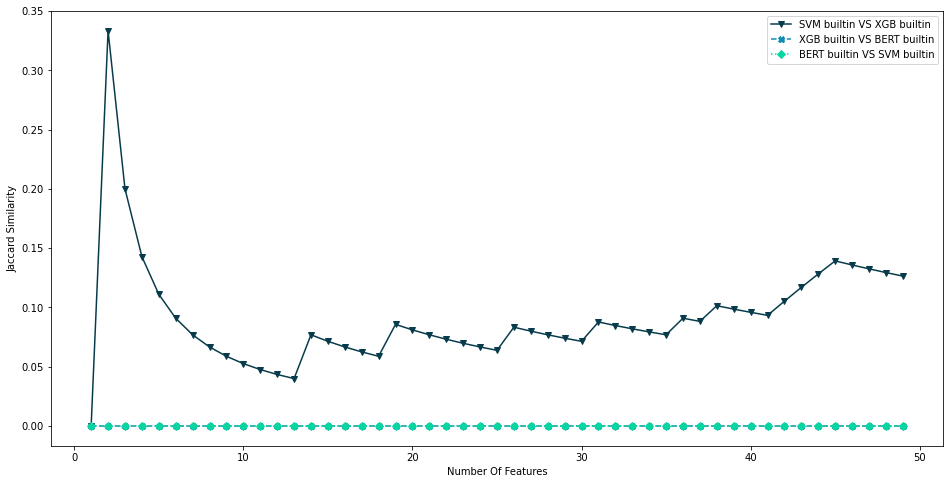

In [25]:

x = [('SVM builtin', 'XGB builtin'),('XGB builtin', 'BERT builtin'), ('BERT builtin', 'SVM builtin')]


plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
     'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
    'BERT builtin' : bert_built_in_df,
    'BERT shap' : bert_shap_df,
    'BERT lime' : bert_lime_feature_importance_df
 
  
}
legend = []
counter = 0
l = []
for df_a_key in model_list.keys():
    for df_b_key in model_list.keys():
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        if (df_a_key,df_b_key) not in x:
            continue
        l.append((df_a_key,df_b_key))
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1

plt.legend(legend)

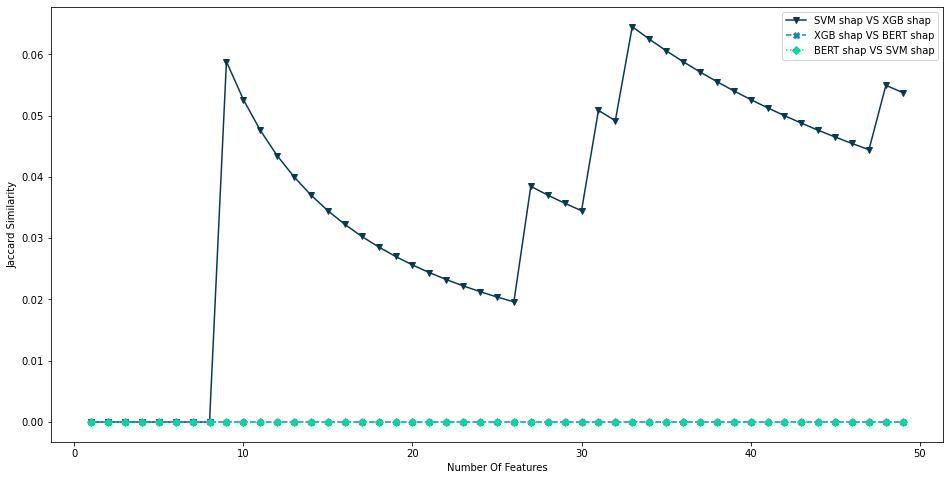

In [26]:

x = [('SVM shap', 'XGB shap'),('XGB shap', 'BERT shap'), ('BERT shap', 'SVM shap')]


plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
     'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
    'BERT builtin' : bert_built_in_df,
    'BERT shap' : bert_shap_df,
    'BERT lime' : bert_lime_feature_importance_df
 
  
}
legend = []
counter = 0
l = []
for df_a_key in model_list.keys():
    for df_b_key in model_list.keys():
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        if (df_a_key,df_b_key) not in x:
            continue
        l.append((df_a_key,df_b_key))
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1

plt.legend(legend)

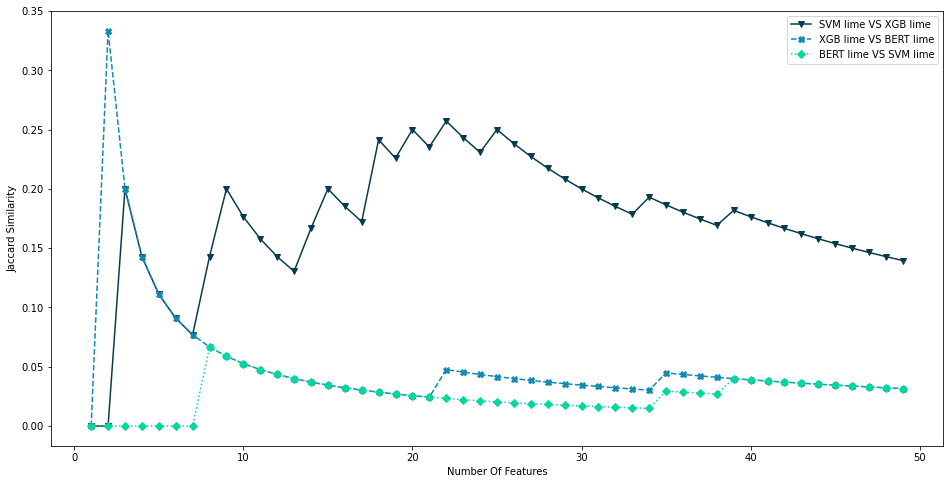

In [27]:

x = [('SVM lime', 'XGB lime'),('XGB lime', 'BERT lime'), ('BERT lime', 'SVM lime')]


plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
     'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
    'BERT builtin' : bert_built_in_df,
    'BERT shap' : bert_shap_df,
    'BERT lime' : bert_lime_feature_importance_df
 
  
}
legend = []
counter = 0
l = []
for df_a_key in model_list.keys():
    for df_b_key in model_list.keys():
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        if (df_a_key,df_b_key) not in x:
            continue
        l.append((df_a_key,df_b_key))
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1

plt.legend(legend)

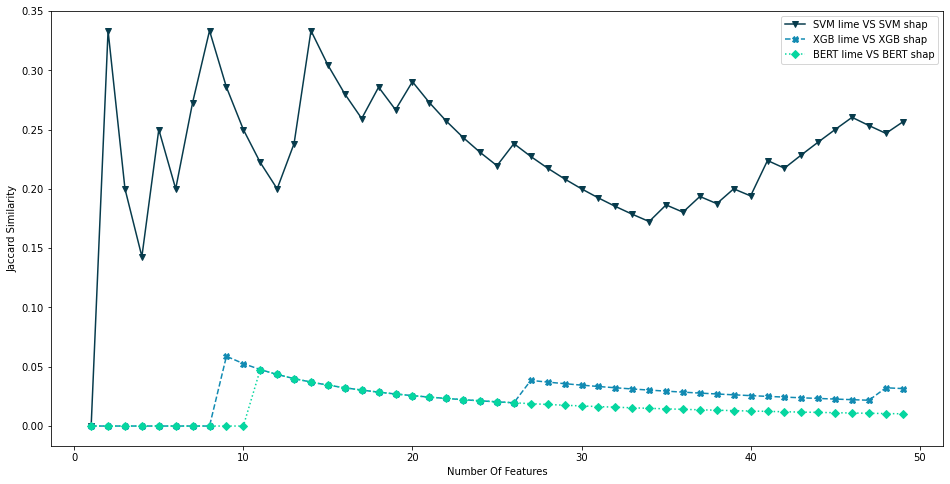

In [29]:
x = [('SVM lime', 'SVM shap'), ('XGB lime',  'XGB shap' ), ('BERT lime','BERT shap' )]
    

plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
     'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
    'BERT builtin' : bert_built_in_df,
    'BERT shap' : bert_shap_df,
    'BERT lime' : bert_lime_feature_importance_df
 
  
}
legend = []
counter = 0
l = []
for df_a_key in model_list.keys():
    for df_b_key in model_list.keys():
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        if (df_a_key,df_b_key) not in x:
            continue
        l.append((df_a_key,df_b_key))
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        legend.append(f'{df_a_key} VS {df_b_key}')
        
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1

plt.legend(legend)